In [1]:
# Import modules
import Hyper_parameter_search
from Hyper_parameter_search import Hyperparameter_Test_n_data,LSTM,conv_total_out, Smoothing_method,weights_init_normal,HyperParameters,Hyperparameter_Search,Hyperparameter_Test,Hyper_parameter_GridSearch,TSCNN,Compile_class,Compile_train,Compare_epochs, from_torch_to_Datagrid

import inspect
import random
import torch
import torch.nn.init as init
import torch.nn.functional as F
import torch.nn as nn
import pandas as pd
import os
from torch import optim
from torch.autograd import Variable
from torchvision import datasets, transforms
from torchvision.utils import save_image
from torch.nn.utils.rnn import pack_sequence
import pandas as pd
import numpy as np
from numpy import *
import seaborn as sns
import matplotlib
from scipy.stats import norm
# matplotlib.use('TkAgg')
from matplotlib import pyplot as plt
import skfda as fda
from skfda import representation as representation
from skfda.exploratory.visualization import FPCAPlot
from skfda.exploratory.visualization import FPCAPlot
from skfda.preprocessing.dim_reduction import FPCA
from skfda.representation.basis import BSpline, Fourier, Monomial
import scipy
from scipy.interpolate import BSpline
import os
import ignite
from tqdm import tqdm
import sklearn
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
import random
from random import seed
from scipy import stats
import statistics
from statistics import stdev
import gc
import skfda
from skfda import FDataGrid as fd
from skfda.representation.basis import BSpline as B
from Hyper_parameter_search import Compare_n_datas

In [2]:
##Importation des 1ère données: Phonèmes
##Tâche: Classification en 5 classes 
Phoneme=skfda.datasets.fetch_cran("phoneme",package_name="fda.usc")
phoneme=Phoneme['phoneme']

x_train,x_test,y_train,y_test=phoneme['learn'],phoneme['test'],phoneme['classlearn'],phoneme['classtest']


x_train_tensor=torch.tensor(x_train.data_matrix).reshape(250,1,150).cuda().float()
x_test_tensor=torch.tensor(x_test.data_matrix).reshape(250,1,150).cuda().float()
y_train_tensor=torch.tensor(y_train.codes).unsqueeze(1).unsqueeze(2).long().cuda()
y_test_tensor=torch.tensor(y_test.codes).unsqueeze(1).unsqueeze(2).long().cuda()

X1=torch.cat([x_train_tensor,x_test_tensor])
Y1=torch.cat([y_train_tensor,y_test_tensor])

c:\Users\Utilisateur\anaconda3\lib\site-packages\rdata\conversion\_conversion.py:321: UserWarning: Unknown encoding. Assumed ASCII.
  warnings.warn("Unknown encoding. Assumed ASCII.")
c:\Users\Utilisateur\anaconda3\lib\site-packages\rdata\conversion\_conversion.py:321: UserWarning: Unknown encoding. Assumed ASCII.
  warnings.warn("Unknown encoding. Assumed ASCII.")


In [3]:
##Importation des 2nd données: El_nino
##Tâche: Classification en 4 classes 
ElNino_OISST_region_1and2=skfda.datasets.fetch_cran("ElNino_OISST_region_1and2","rainbow")
ElNino_OISST_region_3=skfda.datasets.fetch_cran("ElNino_OISST_region_3","rainbow")
ElNino_OISST_region_4=skfda.datasets.fetch_cran("ElNino_OISST_region_4","rainbow")
ElNino_OISST_region_3and4=skfda.datasets.fetch_cran("ElNino_OISST_region_3and4","rainbow")
ElNino_OISST_region_1and2_y=ElNino_OISST_region_1and2['ElNino_OISST_region_1and2']['y'].to_numpy()
ElNino_OISST_region_1and2_x=ElNino_OISST_region_1and2['ElNino_OISST_region_1and2']['x']
# plt.plot(ElNino_OISST_region_1and2_x,ElNino_OISST_region_1and2_y)
# plt.show(
# )
ElNino_OISST_region_3_y=ElNino_OISST_region_3['ElNino_OISST_region_3']['y'].to_numpy()
ElNino_OISST_region_3_x=ElNino_OISST_region_3['ElNino_OISST_region_3']['x']
# plt.plot(ElNino_OISST_region_3_x,ElNino_OISST_region_3_y)
# plt.show(

# )
ElNino_OISST_region_3and4_y=ElNino_OISST_region_3and4['ElNino_OISST_region_3and4']['y'].to_numpy()
ElNino_OISST_region_3and4_x=ElNino_OISST_region_3and4['ElNino_OISST_region_3and4']['x']
# plt.plot(ElNino_OISST_region_3and4_x,ElNino_OISST_region_3and4_y)
# plt.show(
# )


ElNino_OISST_region_4_y=ElNino_OISST_region_4['ElNino_OISST_region_4']['y'].to_numpy()
ElNino_OISST_region_4_x=ElNino_OISST_region_4['ElNino_OISST_region_4']['x']
# plt.plot(ElNino_OISST_region_4_x,ElNino_OISST_region_4_y)
# plt.show(
# )
grid_points=ElNino_OISST_region_1and2_x
T=len(grid_points)
x0=torch.tensor(ElNino_OISST_region_1and2_y).float().cuda()
x1=torch.tensor(ElNino_OISST_region_3_y).float().cuda()
x2=torch.tensor(ElNino_OISST_region_4_y).float().cuda()
x3=torch.tensor(ElNino_OISST_region_3and4_y).float().cuda()
x0=torch.t(x0)
x1=torch.t(x1)
x2=torch.t(x2)
x3=torch.t(x3)


Y2= torch.tensor([0] * x0.shape[0] + [1] * x1.shape[0] + [2] * x2.shape[0] + [3] * x3.shape[0]).unsqueeze(1).unsqueeze(2).cuda()
X2=torch.concatenate([x0,x1,x2,x3]).reshape(148,1,12)


tec=skfda.datasets.fetch_cran("tecator","fda.usc")
len(tec['tecator']['absorp.fdata'].grid_points[0])

c:\Users\Utilisateur\anaconda3\lib\site-packages\rdata\conversion\_conversion.py:843: UserWarning: Missing constructor for R class "sfts". The constructor for class "fts" will be used instead.
  warnings.warn(
c:\Users\Utilisateur\anaconda3\lib\site-packages\rdata\conversion\_conversion.py:843: UserWarning: Missing constructor for R class "fts". The constructor for class "fds" will be used instead.
  warnings.warn(
c:\Users\Utilisateur\anaconda3\lib\site-packages\rdata\conversion\_conversion.py:843: UserWarning: Missing constructor for R class "fds". The underlying R object is returned instead.
  warnings.warn(
c:\Users\Utilisateur\anaconda3\lib\site-packages\rdata\conversion\_conversion.py:843: UserWarning: Missing constructor for R class "sfts". The constructor for class "fts" will be used instead.
  warnings.warn(
c:\Users\Utilisateur\anaconda3\lib\site-packages\rdata\conversion\_conversion.py:843: UserWarning: Missing constructor for R class "fts". The constructor for class "fds" w

100

In [4]:
####Importation des 3ème données: SOFA
##Tâche: Classification binaire

os.chdir("C:/Users/Utilisateur/Documents/Master_SSD/STAGE_RECHERCHE/Smooth_strides_tests")
# Lire le fichier CSV
sofa = pd.read_csv('sofa.csv')
T=20
# Attribuer des noms de colonnes personnalisés


# Afficher les noms de colonnes
print(sofa.columns)
grid_points=np.arange(T+1)[1:]
sofa.values.shape
Y_X=torch.from_numpy(sofa.values).float().cuda()

Y3,X3=Y_X[:,0].unsqueeze(1).unsqueeze(2).long(),Y_X[:,1:T+1].reshape(520,1,T)
X3.shape


Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       ...
       'V165', 'V166', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173',
       'V174'],
      dtype='object', length=174)


torch.Size([520, 1, 20])

In [5]:
X4,Y4=skfda.datasets.fetch_weather(return_X_y=True)
Y4=torch.tensor(Y4).long().unsqueeze(1).unsqueeze(2).cuda()
smoother=Smoothing_method(Mode='smooth',order=4,n_knots=8)

basis=skfda.representation.basis.VectorValuedBasis([smoother.smoothing()
    ,
    smoother.smoothing(),

])
param4=HyperParameters(n_channel=1,basis=smoother.smoothing())


In [6]:
##Création des dictionnaires de datasets
data_dict1 = {
    'X': X1,
    'Y': Y1,
    'dataset_name': "Phoneme (500 data_points, 5 classes, 1 channel)"
}
data_dict2= {
    'X': X2,
    'Y': Y2,
    'dataset_name': "El Nino (150 data_points, 4 classes, 1 channel)"
}
data_dict3 = {
    'X': X3,
    'Y': Y3,
    'dataset_name': "Sofa (520 data_points, 2 classes, 1 channel)"
}
data_dict4 = {
    'X': X4,
    'Y': Y4,
    'dataset_name': "Canadian_weather (35 data_points, 4 classes, 2 channel)"
}
Data_list=[data_dict4,data_dict1,data_dict2,data_dict3]
##Création des listes de modèles  
model_list=["LSTM","MLP","TSCNN","GRU"]

In [19]:
##Création des méthodes de smoothing pour chaque dataset:
##Phoneme
Smoother1=Smoothing_method(n_knots=8,order=4)

##Choix du nombre d'epochs 
n_epoch=50
opt='Adam'
##Création des hyperparamètres:

param1=HyperParameters(n_epochs=n_epoch, Smoothing_method=Smoother1, granulation=5000,
                 n_conv_in=32, n_conv_in2=64, n_conv_in3=128,n_conv_out=2, n_Flat_out=256,
                 stride_1=200, stride_2=1, stride_3=1,
                 stride_pool_1=1, stride_pool_2=2, stride_pool_3=2,
                 kernel_size_1=12,  kernel_size_2=3, kernel_size_3=4,
                 kernel_size_pool_1=3, kernel_size_pool_2=2, kernel_size_pool_3=3,
                 dilation_1=150, dilation_2=1, dilation_3=1,
                 dilation_pool_1=1, dilation_pool_2=1, dilation_pool_3=1,
                 padding_1=200, padding_2=2, padding_3=2,
                 padding_pool_1=1, padding_pool_2=1, padding_pool_3=1,
                 opt=opt, lr=0.0089, loss=nn.CrossEntropyLoss(),activation=nn.Identity(),negative_slope=0.17,derivative=[0])

param2=HyperParameters(n_epochs=20, Smoothing_method=Smoother1, granulation=5000,
                 n_conv_in=32, n_conv_in2=512, n_conv_in3=256, n_Flat_out=256,
                 stride_1=110, stride_2=1, stride_3=1,
                 stride_pool_1=3, stride_pool_2=1, stride_pool_3=1,
                 kernel_size_1=30,  kernel_size_2=5, kernel_size_3=4,
                 kernel_size_pool_1=3, kernel_size_pool_2=2, kernel_size_pool_3=2,
                 dilation_1=120, dilation_2=1, dilation_3=1,
                 dilation_pool_1=1, dilation_pool_2=1, dilation_pool_3=1,
                 padding_1=0, padding_2=2, padding_3=2,
                 padding_pool_1=0, padding_pool_2=0, padding_pool_3=0,
                 opt=opt, lr=0.00095, loss=nn.CrossEntropyLoss(),
                 activation=nn.Identity(),
                 negative_slope=0.18,derivative=[0,1])
param3=HyperParameters(n_epochs=50, Smoothing_method=Smoother1, granulation=1000,
                 n_conv_in=128, n_conv_in2=128, n_conv_in3=128, n_Flat_out=64,
                 stride_1=95, stride_2=1, stride_3=1,
                 stride_pool_1=3, stride_pool_2=2, stride_pool_3=2,
                 kernel_size_1=12,  kernel_size_2=3, kernel_size_3=4,
                 kernel_size_pool_1=3, kernel_size_pool_2=2, kernel_size_pool_3=3,
                 dilation_1=250, dilation_2=1, dilation_3=1,
                 dilation_pool_1=1, dilation_pool_2=1, dilation_pool_3=1,
                 padding_1=0, padding_2=2, padding_3=2,
                 padding_pool_1=1, padding_pool_2=1, padding_pool_3=1,
                 opt=opt, lr=0.001, loss=nn.CrossEntropyLoss(),
                 activation=nn.Identity(),
                 negative_slope=0.18,derivative=[0,1,2])
params_list=[param2]
params_special=[param2,param3,param2,param3]
conv_total_out(param2)

3

In [17]:
colors=["magenta","darkgreen","darkred","darkblue"]
label=["param1 "," param2","param3"]


Canadian_weather (35 data_points, 4 classes, 2 channel)
LSTM


100%|██████████| 30/30 [05:15<00:00, 10.53s/it]


MLP


100%|██████████| 30/30 [01:29<00:00,  2.99s/it]


TSCNN


100%|██████████| 30/30 [22:32<00:00, 45.07s/it]


GRU


100%|██████████| 30/30 [05:08<00:00, 10.28s/it]


Phoneme (500 data_points, 5 classes, 1 channel)
LSTM


100%|██████████| 30/30 [04:59<00:00,  9.99s/it]


MLP


100%|██████████| 30/30 [01:16<00:00,  2.56s/it]


TSCNN


100%|██████████| 30/30 [09:41<00:00, 19.37s/it]


GRU


100%|██████████| 30/30 [04:58<00:00,  9.95s/it]


El Nino (150 data_points, 4 classes, 1 channel)
LSTM


  0%|          | 0/30 [00:09<?, ?it/s]


RuntimeError: The expanded size of the tensor (10) must match the existing size (11) at non-singleton dimension 0.  Target sizes: [10].  Tensor sizes: [11]

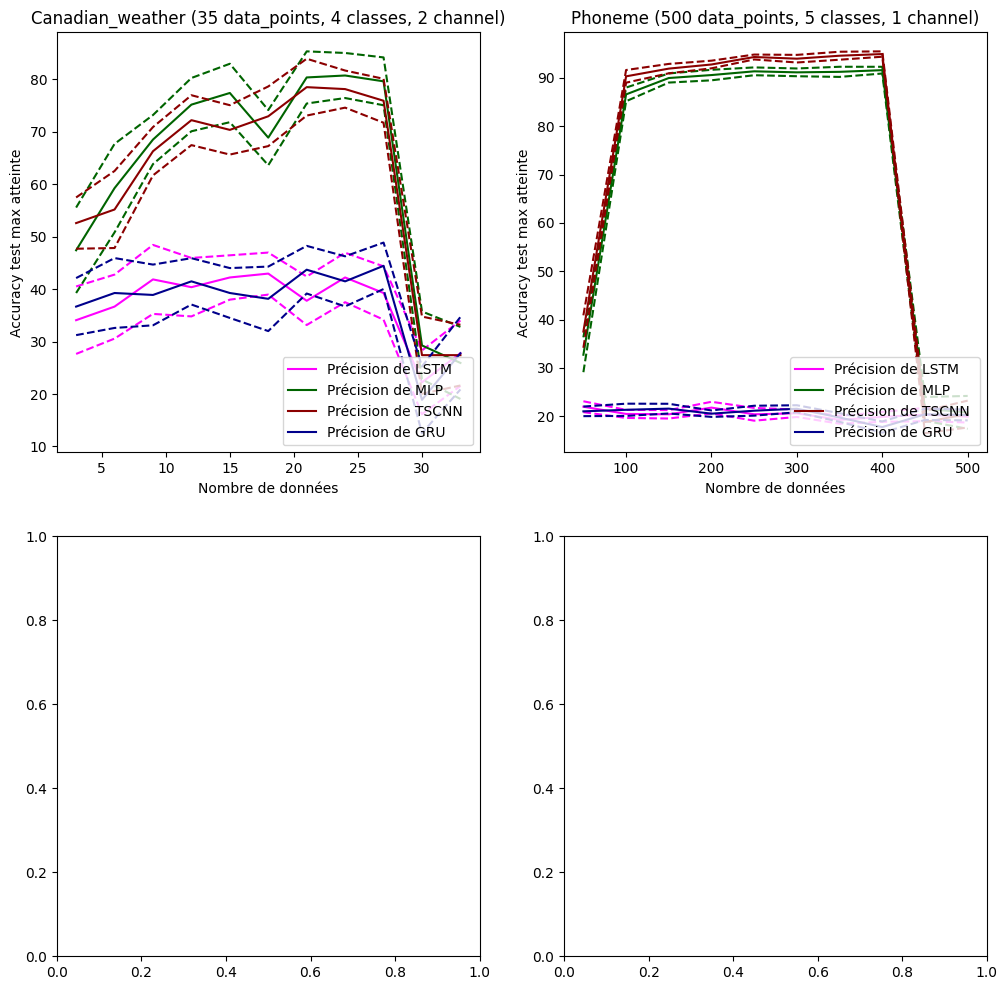

In [20]:
Compare_n_datas(
    datasets=Data_list,
    models=model_list,
    params=params_list,
    spec_param=params_special,
    colors=colors,
    alpha=0.95,
    # label=label,
    supra_epochs=30,

    checkpoints_number=10,
)

In [23]:
X1.shape,X2.shape,X3.shape,X4.shape

(torch.Size([500, 1, 150]),
 torch.Size([148, 1, 12]),
 torch.Size([520, 1, 20]),
 (35,))

In [ ]:
max_monte_carlo_test_acc,max_monte_carlo_train_acc,mean_acc_train,var_acc_train,IC_acc_train, mean_acc_test,var_acc_test,IC_acc_test=Hyperparameter_Test_n_data(hyperparameters=param2,
                           model_class="mlp",
                           supra_epochs=5,n_data=20,alpha=0.95,
                           x=X1,y=Y1)

100%|██████████| 5/5 [00:06<00:00,  1.20s/it]


In [ ]:
mean_acc_test.shape

torch.Size([20])

In [ ]:
monte_carlo_test_acc=torch.zeros(param2.n_epochs+1,1)
monte_carlo_train_acc=torch.zeros(param2.n_epochs+1,1)
Model=Compile_class(hyperparams=param2,output_size=4,x_train=X2,model_class="MLP")
amount_data=30
data_amount=amount_data
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(X2,Y2,shuffle=True)    
x_train,y_train=x_train[2:data_amount],y_train[2:data_amount]
print(x_train.shape,y_train.shape)

for data in range(2,amount_data,amount_data//15):
    # print(x_train[:data+2].shape,y_train[:data+2].shape)
    train_fn = Compile_train(module=Model, hyperparams=param2,X=X2,Y=Y2,data_amount=data+2)
    
    monte_carlo_train,monte_carlo_test=train_fn(n_epochs=param2.n_epochs)
    monte_carlo_test_acc=torch.cat([monte_carlo_test_acc,monte_carlo_test.unsqueeze(1)],dim=1)
    monte_carlo_train_acc=torch.cat([monte_carlo_train_acc,monte_carlo_train.unsqueeze(1)],dim=1)

max_acc_test=torch.max(monte_carlo_test_acc[1:,1:],dim=0).values.float()
max_acc_train=torch.max(monte_carlo_train_acc[1:,1:],dim=0).values.float()
print(max_acc_test.shape,monte_carlo_test_acc.shape)

NameError: name 'torch' is not defined

Canadian_weather (35 data_points, 4 classes, 2 channel)
LSTM


100%|██████████| 35/35 [02:16<00:00,  3.90s/it]


MLP


100%|██████████| 35/35 [00:21<00:00,  1.61it/s]


TSCNN


100%|██████████| 35/35 [12:19<00:00, 21.14s/it]


GRU


100%|██████████| 35/35 [02:22<00:00,  4.06s/it]


Phoneme (500 data_points, 5 classes, 1 channel)
LSTM


100%|██████████| 35/35 [02:23<00:00,  4.11s/it]


MLP


100%|██████████| 35/35 [00:20<00:00,  1.72it/s]


TSCNN


100%|██████████| 35/35 [05:50<00:00, 10.02s/it]


GRU


100%|██████████| 35/35 [02:11<00:00,  3.77s/it]


El Nino (150 data_points, 4 classes, 1 channel)
LSTM


100%|██████████| 35/35 [02:08<00:00,  3.67s/it]


MLP


100%|██████████| 35/35 [00:18<00:00,  1.88it/s]


TSCNN


100%|██████████| 35/35 [03:54<00:00,  6.71s/it]


GRU


100%|██████████| 35/35 [02:07<00:00,  3.66s/it]


Sofa (520 data_points, 2 classes, 1 channel)
LSTM


100%|██████████| 35/35 [02:09<00:00,  3.71s/it]


MLP


100%|██████████| 35/35 [00:18<00:00,  1.86it/s]


TSCNN


100%|██████████| 35/35 [05:11<00:00,  8.91s/it]


GRU


100%|██████████| 35/35 [02:12<00:00,  3.77s/it]


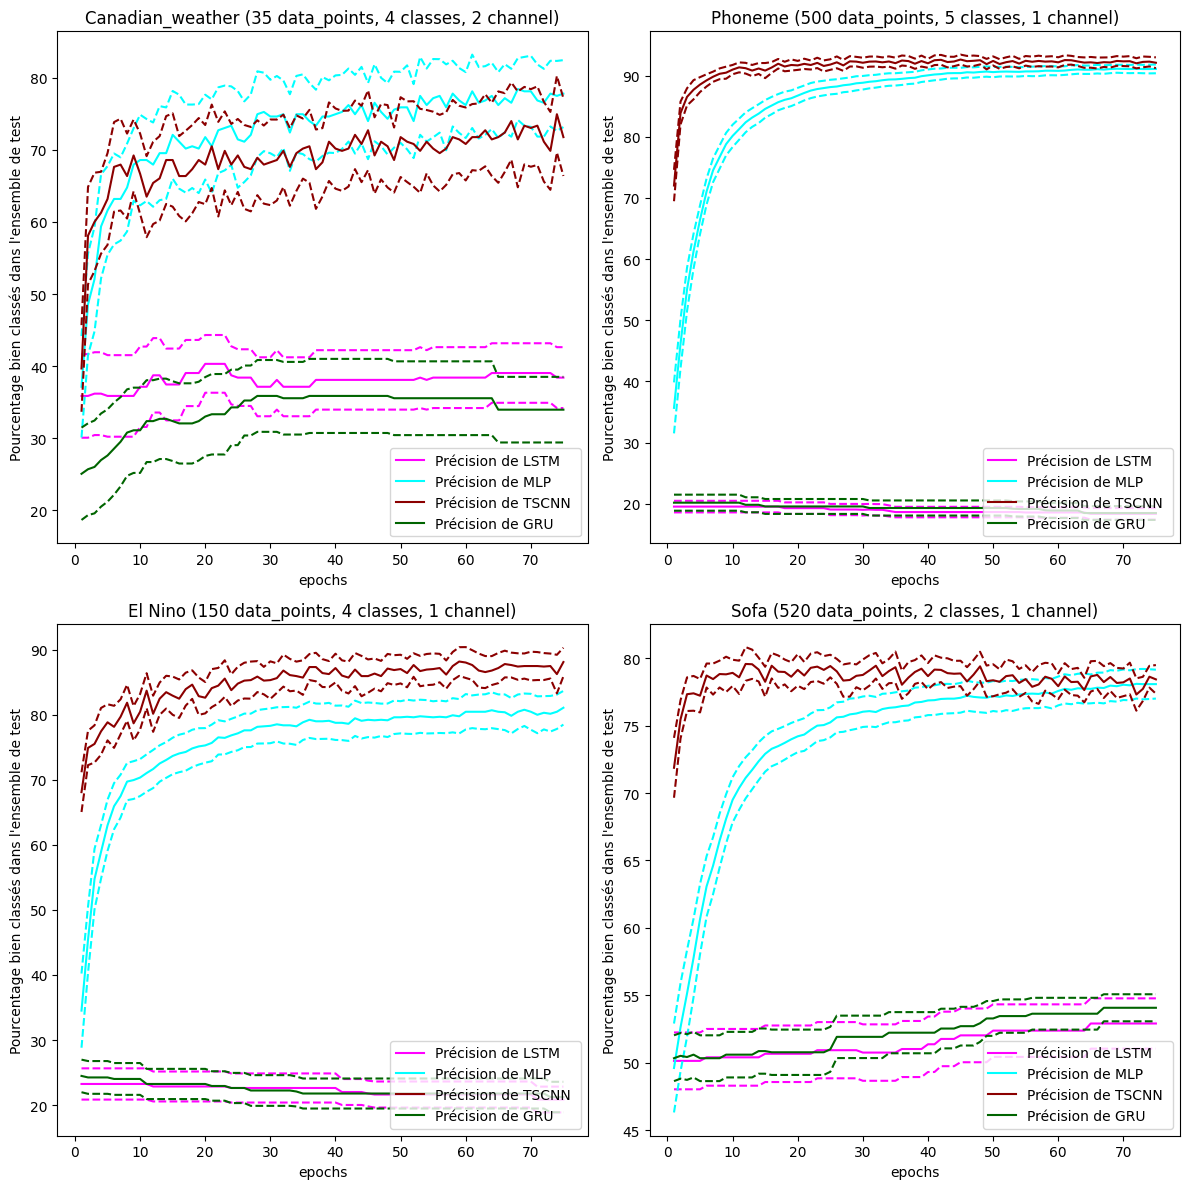

torch.Size([75, 35, 4, 1, 4])

In [ ]:
fig,monte_carlo_test_acc,monte_carlo_train_acc,mean_acc_train,mean_acc_test,var_acc_train,var_acc_test,IC_acc_train,IC_acc_test=Compare_epochs(
    datasets=Data_list,
    models=model_list,
    params=params_list,
    colors=colors,
    alpha=0.95,
    label=label,
    supra_epochs=35
)
monte_carlo_test_acc.shape

In [ ]:
lstm=Compile_class(model_class="lstm",hyperparams=param1,output_size=4,x_train=X4)
data_matrix=torch.tensor(X4.data_matrix).float().cuda()
input=data_matrix.reshape(35,2,365)

rnn_out,_=lstm.lstm(input)
rnn_out
# lstm.hyperparameters.n_channel
lstm.fc_block(rnn_out).shape


torch.Size([35, 4])

In [ ]:
lstm=Compile_class(model_class="gru",hyperparams=param1,output_size=4,x_train=X4)
data_matrix=torch.tensor(X4.data_matrix).float().cuda()
input=data_matrix.reshape(35,2,365)

rnn_out,_=lstm.gru(input)
rnn_out
# lstm.hyperparameters.n_channel
lstm.fc_block(rnn_out).shape


torch.Size([35, 4])

In [ ]:
grids_SFCNN = {
    "n_epochs": 25,
    "basis": (B(knots=linspace(1,T,9),order=4)),
    "granulation": (10000,15000),
    "n_conv_in": (32,64, 128,256),
    "n_conv_in2": (32,64, 128,256),
    "n_conv_in3": (32,64, 128,256),
    "n_Flat_out": (32,64, 128,256),
    "stride_1": (20,30,40),
    "stride_2": 2,
    "stride_3": 1,
    "stride_pool_1": 2,
    "stride_pool_2": 2,
    "stride_pool_3": 1,
    "kernel_size_1": (400,450),
    "kernel_size_2": (30,40,50),
    "kernel_size_3": (3,4,5),
    "kernel_size_pool_1": np.arange(3)[2:],
    "kernel_size_pool_2": np.arange(3)[2:],
    "kernel_size_pool_3": (2,3),
    "dilation_1": 1,
    "dilation_2": 1,
    "dilation_3": 1,
    "dilation_pool_1": 1,
    "dilation_pool_2": 1,
    "dilation_pool_3": 1,
    "padding_1": np.arange(10)[1:],
    "padding_2": np.arange(10)[1:],
    "padding_3": np.arange(10)[1:],
    "padding_pool_1": np.arange(4)[1:],
    "padding_pool_2": np.arange(4)[1:],
    "padding_pool_3": np.arange(4)[1:],
    "opt": "Adam",
    "lr": (0.00089,0.0001,0.00007),
    "loss": nn.CrossEntropyLoss()
}


In [ ]:
grids_FCNN = {
    "n_epochs": 25,
    "n_conv_in": (32,64, 128,256),
    "n_conv_in2": (32,64, 128,256),
    "n_conv_in3": (32,64, 128,256),
    "n_Flat_out": (32,64, 128,256),
    "stride_1": (1,2),
    "stride_2": (1,2),
    "stride_3": 1,
    "stride_pool_1": 1,
    "stride_pool_2": 1,
    "stride_pool_3": 1,
    "kernel_size_1": (4,5,6,7),
    "kernel_size_2": (2,3,4),
    "kernel_size_3": (2,3,4),
    "kernel_size_pool_1": np.arange(3)[2:],
    "kernel_size_pool_2": np.arange(3)[2:],
    "kernel_size_pool_3": (2,3),
    "dilation_1": np.arange(3)[1:],
    "dilation_2": np.arange(3)[1:],
    "dilation_3": np.arange(3)[1:],
    "dilation_pool_1": 1,
    "dilation_pool_2": 1,
    "dilation_pool_3": 1,
    "padding_1": np.arange(3)[1:],
    "padding_2": np.arange(3)[1:],
    "padding_3": np.arange(3)[1:],
    "padding_pool_1": np.arange(2)[1:],
    "padding_pool_2": np.arange(2)[1:],
    "padding_pool_3": np.arange(2)[1:],
    "opt": "Adam",
    "lr": (0.00089,0.0001,0.00007),
    "loss": nn.CrossEntropyLoss()
}


In [ ]:

# x,curves,y=DataGenerator()
# x.shape ,curves.shape
# grid_points=linspace(0,1,21)
# X4=torch.tensor(x.reshape(1000,1,21)).float().cuda()

# Y4=torch.tensor(y).unsqueeze(1).unsqueeze(2).long().cuda()

# x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(X4,Y4,shuffle=True)
# x_train.shape,x_test.shape,y_train.shape,y_test.shape

# plt.plot(np.transpose(x))
# plt.show()

In [ ]:

# # nc: number of data points per *class*, classes: number of classes/cluster, noise:std of the normal noise
# def DataGenerator(nc=250, tpts = np.linspace(0,1,21),classes=4,std=2):
#     n = nc*classes
#     n_basis=12
#     bss = representation.basis.BSpline(n_basis=n_basis, order=4)
#     bss_eval = bss(tpts, derivative=0)
#     bss_fct = bss_eval[:, :, 0]
#     C = np.random.random((classes,n_basis))*10
#     CC =np.tile(C,(nc,1))
#     print (CC.shape)
#     plt.plot(np.transpose(matmul(CC,bss_fct)))
#     y=np.repeat(np.arange(classes),nc)
#     Noise = np.reshape(np.random.normal(0,std,n*n_basis),(n,n_basis))
#     X = CC+Noise
#     data = matmul(X, bss_fct)  
#     bss_evalc = bss(np.linspace(0,1,201), derivative=0)
#     bss_fctc = bss_evalc[:, :, 0]
#     curves = matmul(C,bss_fctc)
#     return data,transpose(curves),y


In [ ]:
param_list=["stride_1","kernel_size_1","kernel_size_3","kernel_size_pool_1","kernel_size_pool_2","kernel_size_3","n_conv_in","n_conv_in2","n_conv_in3","n_Flat_out","lr",
            "dilation_1",
"dilation_2",
"dilation_3",
"dilation_pool_1",
"dilation_pool_2",
"dilation_pool_3",]

In [ ]:
best_accuracy





NameError: name 'best_accuracy' is not defined

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       ...
       'V165', 'V166', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173',
       'V174'],
      dtype='object', length=174)


(torch.Size([390, 1, 20]), torch.Size([390, 1, 1]))

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_3552\4002550049.py:21: DeprecationWarning: The method 'evaluate' is deprecated. Please use the normal calling notation on the basis object instead.
  bss_eval = bss.evaluate(tpts, derivative=0)
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_3552\4002550049.py:28: DeprecationWarning: The method 'evaluate' is deprecated. Please use the normal calling notation on the basis object instead.
  bss_evalc = bss.evaluate(np.linspace(0,1,201), derivative=0)


(torch.Size([750, 1, 21]),
 torch.Size([250, 1, 21]),
 torch.Size([750, 1, 1]),
 torch.Size([250, 1, 1]))

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_3552\3966042469.py:79: DeprecationWarning: The method 'evaluate' is deprecated. Please use the normal calling notation on the basis object instead.
  basis_eval=basis.evaluate(eval_points=eval_points)[:, :, 0]


C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_3552\2045868304.py:121: DeprecationWarning: The method 'evaluate' is deprecated. Please use the normal calling notation on the basis object instead.
  basis_eval=basis.evaluate(eval_points=eval_points)[:, :, 0]


C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_3552\2045868304.py:121: DeprecationWarning: The method 'evaluate' is deprecated. Please use the normal calling notation on the basis object instead.
  basis_eval=basis.evaluate(eval_points=eval_points)[:, :, 0]
c:\Users\Utilisateur\anaconda3\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([96, 1, 1])) that is different to the input size (torch.Size([96, 1, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


(tensor(150, device='cuda:0'),
 tensor(22.8201, device='cuda:0', grad_fn=<MseLossBackward0>))

TypeError: unsupported operand type(s) for *: 'Tensor' and 'module'